 #    <h1><center>DONORDRIVE DATA PREP, PROFILE, AND CLEANSING SESSION</center></h1>
 
 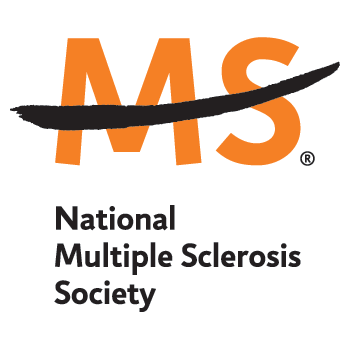
 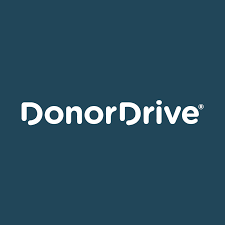

In [1]:
import pandas as pd
import numpy as np

## 1. Loading and Reviewing Files

The first thing to do was to look at all of the files we were given both after 10/1/20 and before, and to compare them and look for differences before and after this cutoff date--Before 10/1/20, our data is from Luminate (Data Warehouse) and has already been looked through to some extent.  The rest of the data has come through DonorDrive and we need to figure out what issues there are with the data coming in.   

In [2]:
dfpre100120 = pd.read_csv('DonorDriveConstituent_pre10012020.csv', header = 4)

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (27,34) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
dfpre100120.columns

Index(['ADDRESS2', 'BIRTHDATE', 'BUSINESSPHONE', 'BUSINESSPHONEEXTENSION',
       'CITY', 'COMPANYNAME', 'CONSTITUENTMANAGEDBY',
       'CONSTITUENTMANAGEDBYEMAIL', 'CONSTITUENTMANAGERRELATIONSHIP',
       'COUNTRY', 'CREATEDBY', 'CREATORRELATIONSHIP', 'DWID', 'ENTEREDDATE',
       'DATE_OF_BIRTH', 'EMAIL', 'EMPLOYER_NAME', 'HASEXTRANETACCESS',
       'FIRSTNAME', 'GENDER', 'HOMEPHONE', 'ISMANAGED', 'ISOFFLINE',
       'LANGUAGE', 'MODIFIEDDATE', 'MODIFIEDBY', 'LASTNAME', 'MIDDLEINITIAL',
       'MOBILEPHONE', 'MOBILECARRIER', 'POSTALCODE', 'PREFERRED_PHONE',
       'RECORDID', 'RELATIONSHIP_TO_MS', 'SALESFORCEID', 'SOURCE', 'STATE',
       'ADDRESS1', 'TEXTMESSAGEOPTIN', 'SUMDONATIONSGIVEN',
       'SUMDONATIONSRAISED', 'TYPE', 'EMAIL_OPT_IN', 'POSTAL_OPT_IN',
       'MOBILE_OPT_IN'],
      dtype='object')

Using the "info" function gives us an overview of the Datatypes and the number of null values in each column in the dataset.

In [4]:
dfpre100120.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97712 entries, 0 to 97711
Data columns (total 45 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADDRESS2                        494 non-null    object 
 1   BIRTHDATE                       0 non-null      float64
 2   BUSINESSPHONE                   55 non-null     float64
 3   BUSINESSPHONEEXTENSION          6 non-null      float64
 4   CITY                            65630 non-null  object 
 5   COMPANYNAME                     14319 non-null  object 
 6   CONSTITUENTMANAGEDBY            97712 non-null  object 
 7   CONSTITUENTMANAGEDBYEMAIL       97712 non-null  object 
 8   CONSTITUENTMANAGERRELATIONSHIP  0 non-null      float64
 9   COUNTRY                         96962 non-null  object 
 10  CREATEDBY                       97712 non-null  object 
 11  CREATORRELATIONSHIP             0 non-null      float64
 12  DWID                            

Below we can see how many unique values there are in each column with the "nunique" function.

In [5]:
dfpre100120.nunique()

ADDRESS2                            422
BIRTHDATE                             0
BUSINESSPHONE                        55
BUSINESSPHONEEXTENSION                6
CITY                               7815
COMPANYNAME                        9765
CONSTITUENTMANAGEDBY                  2
CONSTITUENTMANAGEDBYEMAIL         97712
CONSTITUENTMANAGERRELATIONSHIP        0
COUNTRY                              39
CREATEDBY                            59
CREATORRELATIONSHIP                   0
DWID                              52408
ENTEREDDATE                         118
DATE_OF_BIRTH                     14987
EMAIL                             97712
EMPLOYER_NAME                     11188
HASEXTRANETACCESS                     2
FIRSTNAME                         10675
GENDER                                4
HOMEPHONE                         25556
ISMANAGED                             1
ISOFFLINE                             2
LANGUAGE                              1
MODIFIEDDATE                        116


Finally we take a quick peak at the data using the "head" function. 

In [6]:
dfpre100120.head()

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,SOURCE,STATE,ADDRESS1,TEXTMESSAGEOPTIN,SUMDONATIONSGIVEN,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN
0,NaN,NaN,NaN,NaN,Cincinnati,NaN,SELF,kweyer@globalcloud.net,NaN,US,...,Admin,OH,30 W. Third St.,No,0.0,0.0,I,Yes,Yes,Yes
1,NaN,NaN,NaN,NaN,Braintree,NaN,SELF,grodriguez@globalcloud.net,NaN,US,...,Public,MA,"30 Braintree Hill Office Park, Suite 303",No,0.0,0.0,I,Yes,Yes,Yes
2,NaN,NaN,NaN,NaN,Cincinnati,NaN,SELF,mnash@globalcloud.net,NaN,US,...,Public,OH,30 W 3rd St,No,0.0,0.0,I,Yes,Yes,Yes
3,NaN,NaN,NaN,NaN,Cincinnati,NaN,SELF,alarkin@donordrive.com,NaN,US,...,Admin,OH,30 W 3rd St,No,2.0,0.0,I,Yes,Yes,Yes
4,NaN,NaN,NaN,NaN,Menasha,NaN,SELF,jessica.michels@nmss.org,NaN,US,...,Public,WI,1600 Lakeshore Dr,No,1250.0,25.0,I,Yes,Yes,Yes


 ## POST 10/1/20 Data

Now lets take a look at the data that we really are worried about going forward--The post 10/1/20 data.

In [7]:
dfpost100120 = pd.read_csv('DonorDriveConstituent_post10012020.csv', header = 4)

In [8]:
dfpost100120.columns

Index(['ADDRESS2', 'BIRTHDATE', 'BUSINESSPHONE', 'BUSINESSPHONEEXTENSION',
       'CITY', 'COMPANYNAME', 'CONSTITUENTMANAGEDBY',
       'CONSTITUENTMANAGEDBYEMAIL', 'CONSTITUENTMANAGERRELATIONSHIP',
       'COUNTRY', 'CREATEDBY', 'CREATORRELATIONSHIP', 'DWID', 'ENTEREDDATE',
       'DATE_OF_BIRTH', 'EMAIL', 'EMPLOYER_NAME', 'HASEXTRANETACCESS',
       'FIRSTNAME', 'GENDER', 'HOMEPHONE', 'ISMANAGED', 'ISOFFLINE',
       'LANGUAGE', 'MODIFIEDDATE', 'MODIFIEDBY', 'LASTNAME', 'MIDDLEINITIAL',
       'MOBILEPHONE', 'MOBILECARRIER', 'POSTALCODE', 'PREFERRED_PHONE',
       'RECORDID', 'RELATIONSHIP_TO_MS', 'SALESFORCEID', 'SOURCE', 'STATE',
       'ADDRESS1', 'TEXTMESSAGEOPTIN', 'SUMDONATIONSGIVEN',
       'SUMDONATIONSRAISED', 'TYPE', 'EMAIL_OPT_IN', 'POSTAL_OPT_IN',
       'MOBILE_OPT_IN'],
      dtype='object')

Are there any differences in the data between 10/1/20 and 11/09/2020?  Should we just combine them?

In [9]:
dfpost110920 = pd.read_csv('DonorDriveConstituent_11092020- till date.csv', header = 3)

In [10]:
dfpost110920.head()

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,STATE,ADDRESS1,TEXTMESSAGEOPTIN,SUMDONATIONSGIVEN,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER
0,NaN,NaN,NaN,NaN,janesville,NaN,SELF,moosierae@gmail.com,NaN,US,...,WI,3832 skyview dr,No,0.0,0.0,I,Yes,Yes,Yes,NaN
1,NaN,NaN,NaN,NaN,Charlton,NaN,SELF,adkins2828@hotmail.com,NaN,US,...,NY,822 Charlton Rd,No,50.0,0.0,I,Yes,Yes,Yes,NaN
2,NaN,NaN,NaN,NaN,FAIR OAKS,NaN,SELF,aphilippus7@gmail.com,NaN,US,...,TX,11402 Anaqua Springs,No,250.0,0.0,I,Yes,Yes,Yes,NaN
3,NaN,NaN,NaN,NaN,New York,Ibison4Charity,ADMIN,Ibison4Charity@offline.donordrive.com,NaN,US,...,NY,c/o Fidelity,No,150.0,0.0,C,Yes,Yes,Yes,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.C408B660-A9D0-40AD-54B9D4DF9C22...,NaN,US,...,NaN,NaN,No,35.0,0.0,I,Yes,Yes,Yes,NaN


The only difference appears to be the "Relationship Manager" column in the 11/9/20 file.  Lets combine these files in this case before our analysis so we can do a more complete analysis.

## 2.  Post 10/1/20 Analysis, Concatenation of Data

I decided to focus my efforts on the post 10/1/20 data initially since this is the DonorDrive Data.  I decided to combine the datasets that I had after 10/1/20 and to analyze them together.  Then I ran the same columns, head, info, and nunique functions to get a high level view of the combined data. 

In [11]:
df = pd.concat([dfpost100120, dfpost110920], ignore_index=True)

In [12]:
df.head()

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,STATE,ADDRESS1,TEXTMESSAGEOPTIN,SUMDONATIONSGIVEN,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER
0,apt 1,NaN,NaN,NaN,Hudson,NaN,SELF,josh.conti.13@gmail.com,NaN,US,...,MA,75 School St,No,51.0,636.0,I,Yes,Yes,Yes,NaN
1,NaN,NaN,NaN,NaN,Portland,NaN,SELF,cc.boom49@gmail.com,NaN,US,...,OR,3553 NE Schuyler St.,No,200.0,11160.0,I,Yes,Yes,Yes,NaN
2,NaN,NaN,NaN,NaN,Mount Pleasant,NaN,SELF,iwandodd@gmail.com,NaN,US,...,SC,3576 Hartford Village Way,No,0.0,0.0,I,No,No,Yes,NaN
3,NaN,NaN,NaN,NaN,Piedmont,NaN,SELF,mattcarrere@yahoo.com,NaN,US,...,CA,1021 Leo Way,No,200.0,0.0,I,Yes,Yes,Yes,NaN
4,NaN,NaN,NaN,NaN,Winter Garden,NaN,SELF,ereichwein@accredo.com,NaN,US,...,FL,15143 Lake Claire Overlook Dr.,Yes,0.0,50.0,I,No,Yes,Yes,NaN


In [13]:
df.columns

Index(['ADDRESS2', 'BIRTHDATE', 'BUSINESSPHONE', 'BUSINESSPHONEEXTENSION',
       'CITY', 'COMPANYNAME', 'CONSTITUENTMANAGEDBY',
       'CONSTITUENTMANAGEDBYEMAIL', 'CONSTITUENTMANAGERRELATIONSHIP',
       'COUNTRY', 'CREATEDBY', 'CREATORRELATIONSHIP', 'DWID', 'ENTEREDDATE',
       'DATE_OF_BIRTH', 'EMAIL', 'EMPLOYER_NAME', 'HASEXTRANETACCESS',
       'FIRSTNAME', 'GENDER', 'HOMEPHONE', 'ISMANAGED', 'ISOFFLINE',
       'LANGUAGE', 'MODIFIEDDATE', 'MODIFIEDBY', 'LASTNAME', 'MIDDLEINITIAL',
       'MOBILEPHONE', 'MOBILECARRIER', 'POSTALCODE', 'PREFERRED_PHONE',
       'RECORDID', 'RELATIONSHIP_TO_MS', 'SALESFORCEID', 'SOURCE', 'STATE',
       'ADDRESS1', 'TEXTMESSAGEOPTIN', 'SUMDONATIONSGIVEN',
       'SUMDONATIONSRAISED', 'TYPE', 'EMAIL_OPT_IN', 'POSTAL_OPT_IN',
       'MOBILE_OPT_IN', 'RELATIONSHIP_MANAGER'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27799 entries, 0 to 27798
Data columns (total 46 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ADDRESS2                        503 non-null    object 
 1   BIRTHDATE                       0 non-null      float64
 2   BUSINESSPHONE                   122 non-null    float64
 3   BUSINESSPHONEEXTENSION          1 non-null      float64
 4   CITY                            22036 non-null  object 
 5   COMPANYNAME                     2186 non-null   object 
 6   CONSTITUENTMANAGEDBY            27799 non-null  object 
 7   CONSTITUENTMANAGEDBYEMAIL       27799 non-null  object 
 8   CONSTITUENTMANAGERRELATIONSHIP  0 non-null      float64
 9   COUNTRY                         27471 non-null  object 
 10  CREATEDBY                       27799 non-null  object 
 11  CREATORRELATIONSHIP             0 non-null      float64
 12  DWID                            

In [15]:
df.nunique()

ADDRESS2                            459
BIRTHDATE                             0
BUSINESSPHONE                       122
BUSINESSPHONEEXTENSION                1
CITY                               4864
COMPANYNAME                        2096
CONSTITUENTMANAGEDBY                  2
CONSTITUENTMANAGEDBYEMAIL         27799
CONSTITUENTMANAGERRELATIONSHIP        0
COUNTRY                              31
CREATEDBY                            56
CREATORRELATIONSHIP                   0
DWID                               3421
ENTEREDDATE                         153
DATE_OF_BIRTH                       893
EMAIL                             27799
EMPLOYER_NAME                      2556
HASEXTRANETACCESS                     2
FIRSTNAME                          4906
GENDER                                4
HOMEPHONE                          2987
ISMANAGED                             1
ISOFFLINE                             2
LANGUAGE                              1
MODIFIEDDATE                         79


## 3.  Analysis of Columns

## Address

What if we combined Address 1 and Address 2 in the output?   There are over 5,000 null addresses submitted.  What should we do about the nulls?  What do we do about the addresses that are only numbers after combining address 1 and 2.



In [16]:
df['ADDRESS2'].value_counts()

Unit A      5
B           4
Suite B     3
2           3
Apt A       3
           ..
#801        1
Suite 26    1
2208W       1
10209       1
Unit 309    1
Name: ADDRESS2, Length: 459, dtype: int64

In [17]:
df['ADDRESS1'].value_counts()

# Why are there so many addresses that are the same?

CICDonationsOnHold              73
6111 W Plano Pkwy Ste 1000YC    59
300 Brickstone Sq Ste 601       29
Facebook Fundraiser             14
c/o Schwab Charitable           13
                                ..
4805 Point Alto                  1
324 W Cornell Ave                1
1365 York Avenue 9E, NY NY       1
413 Red Clay Drive               1
795 SE 11th st                   1
Name: ADDRESS1, Length: 21689, dtype: int64

In [18]:
df['ADDRESS2'] = df['ADDRESS2'].fillna("")

In [19]:
#Combines columns and adds a space.

df['ADDRESS1&2'] = df['ADDRESS1'] + " " + df['ADDRESS2']

In [20]:
df['Valid'] = df[df['ADDRESS1&2'].str.contains('[A-Za-z]', na=False)].any(axis=1)
df['Valid'] = df['Valid'].fillna(False)

In [21]:
df.head(60)

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,TEXTMESSAGEOPTIN,SUMDONATIONSGIVEN,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid
0,apt 1,NaN,NaN,NaN,Hudson,NaN,SELF,josh.conti.13@gmail.com,NaN,US,...,No,51.0,636.00,I,Yes,Yes,Yes,NaN,75 School St apt 1,True
1,,NaN,NaN,NaN,Portland,NaN,SELF,cc.boom49@gmail.com,NaN,US,...,No,200.0,11160.00,I,Yes,Yes,Yes,NaN,3553 NE Schuyler St.,True
2,,NaN,NaN,NaN,Mount Pleasant,NaN,SELF,iwandodd@gmail.com,NaN,US,...,No,0.0,0.00,I,No,No,Yes,NaN,3576 Hartford Village Way,True
3,,NaN,NaN,NaN,Piedmont,NaN,SELF,mattcarrere@yahoo.com,NaN,US,...,No,200.0,0.00,I,Yes,Yes,Yes,NaN,1021 Leo Way,True
4,,NaN,NaN,NaN,Winter Garden,NaN,SELF,ereichwein@accredo.com,NaN,US,...,Yes,0.0,50.00,I,No,Yes,Yes,NaN,15143 Lake Claire Overlook Dr.,True
5,,NaN,NaN,NaN,Springfield,Hurts Donut Company,SELF,tkemooch@hotmail.com,NaN,US,...,No,0.0,8565.50,I,No,Yes,Yes,NaN,509 W Olive St Ste 101,True
6,,NaN,NaN,NaN,Southlake,Self,SELF,pamraby@gmail.com,NaN,US,...,Yes,0.0,0.00,I,Yes,No,Yes,NaN,2625 Summit Ridge Drive,True
7,,NaN,NaN,NaN,Portland,NaN,SELF,pcook.pdx@gmail.com,NaN,US,...,No,0.0,2659.56,I,No,Yes,Yes,NaN,1021 SE 33rd Ave,True
8,,NaN,NaN,NaN,Southlake,PricewaterhouseCoopers,SELF,nraby001@gmail.com,NaN,US,...,Yes,0.0,0.00,I,No,No,Yes,NaN,2625 Summit Ridge Drive,True
9,,NaN,NaN,NaN,Napa,BMC Software,SELF,snewhart@salesforce.com,NaN,US,...,No,100.0,100.00,I,No,No,Yes,NaN,1174 Walnut St,True


In [22]:
nulls = df[df['Valid'] != True]

The file, "AddressIssues.xlsx" creates a new column called "Valid".  If we look at this output, we can see all of the entries where we only received numbers or where we recieved null values.

In [23]:
nulls[['ADDRESS1','ADDRESS2','ADDRESS1&2','Valid']].to_excel('AddressIssues.xlsx')


In [24]:
df['Valid'].value_counts()

True     22215
False     5584
Name: Valid, dtype: int64

In [25]:
print(5584/len(df))

0.20087053491132775


It looks like after combining Address 1 & 2, we can see that 20% of the entries are not completing this field with a valid entry.  This logic pulls all the NaNs and all of the fields that didn't include any characters in the address.


##  Birthdate Notes: All fields are blank....

Should we remove this field since it is redundant?

## City:  Some have commas, numbers, or addresses



In [26]:
df["CITY"].value_counts()

New York            641
Philadelphia        331
Greensboro          270
San Antonio         214
Jacksonville        196
                   ... 
Adkins                1
Chauvin               1
Kelvedon Hatch        1
HIGHLAND LKS          1
North Smithfield      1
Name: CITY, Length: 4864, dtype: int64

In [27]:
df["CITYDigits"] = df["CITY"].str.contains('\d', regex=True)

In [28]:
df[df["CITYDigits"]==True]

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,SUMDONATIONSGIVEN,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid,CITYDigits
7034,,NaN,NaN,NaN,"Irvine, CA 92612",NaN,SELF,chandirakumar@hotmail.com,NaN,US,...,40.0,0.0,I,Yes,Yes,Yes,NaN,15 Gumwood,True,True
7120,,NaN,NaN,NaN,"Mount Laurel, NJ 08054",NaN,SELF,pamstevens11@gmail.com,NaN,US,...,35.0,0.0,I,Yes,Yes,Yes,NaN,288 Everly Court,True,True
8281,,NaN,NaN,NaN,304,NaN,SELF,1lexus.566@gmail.com,NaN,us,...,25.0,0.0,I,Yes,Yes,Yes,NaN,9451,False,True
8631,,NaN,NaN,NaN,"Ridgefield, CT o6877",NaN,SELF,JoeTrench@cs.com,NaN,US,...,250.0,0.0,I,Yes,Yes,Yes,NaN,18 Ascot Way,True,True
9973,,NaN,NaN,NaN,512 Craven St,NaN,ADMIN,MarionThomas@offline.donordrive.com,NaN,US,...,100.0,0.0,I,Yes,Yes,Yes,NaN,512 Craven St,True,True
14916,,NaN,NaN,NaN,1402,NaN,SELF,x1neville@gmail.com,NaN,US,...,200.0,0.0,I,Yes,Yes,Yes,NaN,4705 Outlook Way NE,True,True
19084,,NaN,4.178726e+09,NaN,33216 KSG DB 10132020,"Paul Stoddard Construction, LLC",ADMIN,PaulStoddardConstructionLLC@offline.donordrive...,NaN,US,...,100.0,0.0,C,Yes,Yes,Yes,NaN,9535 N Farm Rd 173,True,True
23094,,NaN,NaN,NaN,4104 Williams Dairy Rd,NaN,ADMIN,WilliamGerrow@offline.donordrive.com,NaN,US,...,50.0,0.0,I,Yes,Yes,Yes,NaN,4104 Williams Dairy Rd,True,True
24356,,NaN,NaN,NaN,8356 Summerdale Ave,NaN,ADMIN,SondraLevy@offline.donordrive.com,NaN,US,...,50.0,0.0,I,Yes,Yes,Yes,NaN,8356 Summerdale Ave,True,True
27007,,NaN,NaN,NaN,Dublin 13,NaN,SELF,aoifeoconnor295@gmail.com,NaN,IE,...,35.0,0.0,I,Yes,Yes,Yes,NaN,179 Howth road,True,True


In [29]:
df[df["CITYDigits"]==True].to_excel("citieswithdigits.xlsx")

Probably we need to put some controls in around the City entry to make sure a full address isn't entered here.

## COMPANYNAME

Combine "Self"?  Also it looks like a few people are inputting the Zip Code erroneously here.

In [30]:
df["COMPANYNAME"].value_counts()

Retired                                     9
self                                        7
Beckman Coulter                             6
Microsoft                                   4
retired                                     4
                                           ..
Kvochak Family Charitable Fund              1
Main Event Entertainment, LP                1
Three Tac Inc dba Miriam's Jewelry Store    1
Stuart Building Products, LLC               1
Tilerama Inc.                               1
Name: COMPANYNAME, Length: 2096, dtype: int64

In [31]:
df["COMPANYDIGITS"] = df["COMPANYNAME"].str.contains('\d', regex=True)

In [32]:
df[df["COMPANYDIGITS"]==True]

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,SUMDONATIONSRAISED,TYPE,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid,CITYDigits,COMPANYDIGITS
22,,NaN,NaN,NaN,Kansas City,1981,SELF,delvin.higginson@gmail.com,NaN,US,...,1410.0,I,No,No,Yes,NaN,522 Locust Ln Unit 104,True,False,True
57,,NaN,NaN,NaN,Auburn,IAFF Local 1352 Benevolent,SELF,IAFFLocal1352Benevolent@offline.donordrive.com,NaN,US,...,0.0,C,No,No,Yes,NaN,1951 R St SE,True,False,True
234,,NaN,NaN,NaN,Westbrook,Eagles Fraternal Order of 2977,SELF,EaglesFraternalOrderof2977@offline.donordrive.com,NaN,US,...,0.0,C,No,Yes,Yes,NaN,89 Saco St,True,False,True
309,,NaN,NaN,NaN,El Dorado,"Code 3 Services, LLC",SELF,Code3ServicesLLC@offline.donordrive.com,NaN,US,...,0.0,C,No,Yes,Yes,NaN,PO Box 10278,True,False,True
382,,NaN,NaN,NaN,Nashville,37216,SELF,dafrapster@gmail.com,NaN,US,...,1000.0,I,No,Yes,Yes,NaN,1012A Virginia Ave,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26739,,NaN,NaN,NaN,Port Allen,WBR Parish School Board Caneview K-8,ADMIN,WBRParishSchoolBoardCaneviewK8@offline.donordr...,NaN,US,...,0.0,C,Yes,Yes,Yes,NaN,5217 McLin Rd,True,False,True
26754,,NaN,5.054716e+09,NaN,Santa Fe,A-1 Transmissions,ADMIN,A1Transmissions@offline.donordrive.com,NaN,US,...,0.0,C,Yes,Yes,Yes,NaN,1318 Rufina Cir,True,False,True
26783,,NaN,NaN,NaN,New Orleans,Communications Workers of America Local 3410,ADMIN,CommunicationsWorkersofAmericaLocal3410@offlin...,NaN,US,...,0.0,C,Yes,Yes,Yes,NaN,837 N Carrollton Ave,True,False,True
26953,,NaN,NaN,NaN,Laguna Woods,"STAGE 21 BIKES, Inc.",SELF,stage21bikes@gmail.com,NaN,US,...,0.0,C,Yes,Yes,Yes,NaN,23582 Moulton Parkway,True,False,True


I created another output file called "CompanyDigits.xlsx" where we can see all of the Companies that contain digits.  Some of these appear to be zip codes or other invalid number fields.

In [33]:
df[df["COMPANYDIGITS"]==True].to_excel("CompanyDigits.xlsx")

## CREATORRELATIONSHIP

Should we remove this field since no one is filling it out?

In [34]:
df["CREATORRELATIONSHIP"].value_counts()

Series([], Name: CREATORRELATIONSHIP, dtype: int64)

## DWID

What is this?  What kinds of values should we expect here?  The file after 11/09/20 appears to have values that are either emails or in the "PAX DB" Format below.  This is our unique ID from our data---there are some inconsistencies in the data submitted. Let's pull out all of the fields that contain alphas, and output them to the "nanorAlphaDWID.xlsx" output. 

In [35]:
df["DWID"].value_counts()

alfredo.lewis@nmss.org    3
kevin.jenkyns@nmss.org    3
80635115                  2
75486635                  2
33742 PAX DB 11092020     2
                         ..
93247149.0                1
93395747.0                1
93369757.0                1
90365017.0                1
93495299.0                1
Name: DWID, Length: 3421, dtype: int64

In [36]:
df['DWID'] = df['DWID'].astype('|S') #convert obejct into byte string
df['DWID'] = df['DWID'].str.decode("utf-8") # Decode byte strings into ordinary strings
df['ValidDWID'] = df[df['DWID'].str.contains('[A-Za-z]', na=False)].any(axis=1)

In [37]:
df[['DWID','ValidDWID']].to_excel("nanorAlphaDWID.xlsx")

## Email Review

There seem to be two categories of email we should be worried about.  The first issue are the emails that come from Facebook.  The other is the emails that contain the word "Offline" but come outside of Facebook.  

In [38]:
df["FacebookEMAIL"] = df["CONSTITUENTMANAGEDBYEMAIL"].str.contains('facebook')

In [39]:
df[df["FacebookEMAIL"]==True]

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid,CITYDigits,COMPANYDIGITS,ValidDWID,FacebookEMAIL
1347,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.A3AD6A71-AA94-08B0-5106F5C5B03F...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
1348,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.A3B4EC38-E07F-3128-ADF786D99049...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
1353,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.A53A1854-D44F-C2D6-97ED24962EA3...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
1354,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.A540F018-07F0-5B3F-F4A5BB69215D...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
1355,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.A54E4FC2-C120-9E43-65F581A1BC4D...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27767,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.49D07C17-D5FC-902B-27C51DB098D3...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
27779,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.653FED8D-C1B8-C450-40542DD89E79...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
27781,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.679D1A33-D6FC-827F-4B77A2CD6DEF...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True
27783,,NaN,NaN,NaN,NaN,NaN,ADMIN,facebook.donor.6AF48457-F70F-AEC9-B6209DD49E5C...,NaN,US,...,Yes,Yes,Yes,NaN,NaN,False,NaN,NaN,True,True


There are 5,359 rows that are from Facebook.

In [40]:
dfofflinenotfacebook = df[(df["CONSTITUENTMANAGEDBYEMAIL"].str.contains("offline") == True) & (df["CONSTITUENTMANAGEDBYEMAIL"].str.contains("facebook") == False)]


In [41]:
dfofflinenotfacebook

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid,CITYDigits,COMPANYDIGITS,ValidDWID,FacebookEMAIL
57,,NaN,NaN,NaN,Auburn,IAFF Local 1352 Benevolent,SELF,IAFFLocal1352Benevolent@offline.donordrive.com,NaN,US,...,No,No,Yes,NaN,1951 R St SE,True,False,True,NaN,False
153,,NaN,NaN,NaN,Parsons,Performance Enhancement Center LLC,SELF,PerformanceEnhancementCenterLLC@offline.donord...,NaN,US,...,No,No,No,NaN,2100 Commerce Dr,True,False,False,NaN,False
155,,NaN,NaN,NaN,Amelia,American Modern Foundation,SELF,AmericanModernFoundation@offline.donordrive.com,NaN,US,...,No,No,No,NaN,7000 Midland Blvd,True,False,False,NaN,False
156,,NaN,NaN,NaN,Green Bay,The Dough Shoppe,SELF,TheDoughShoppe@offline.donordrive.com,NaN,US,...,No,No,No,NaN,844 Willard Dr Ste 2,True,False,False,NaN,False
157,,NaN,NaN,NaN,Mechanicsburg,Shenk Company,SELF,ShenkCompany@offline.donordrive.com,NaN,US,...,No,Yes,Yes,NaN,5010 E Trindle Rd,True,False,False,NaN,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27784,,NaN,NaN,NaN,La Mesa,NaN,ADMIN,CarolHolmgren@offline.donordrive.com,NaN,US,...,Yes,Yes,Yes,NaN,10432 Sierra Vista Ave,True,False,NaN,True,False
27787,,NaN,NaN,NaN,Minneapolis,The Lab,ADMIN,TheLab@offline.donordrive.com,NaN,US,...,Yes,Yes,Yes,NaN,"767 N. Eustis St., Suite 115",True,False,False,True,False
27788,,NaN,NaN,NaN,El Cajon,NaN,ADMIN,JenniferBiggins@offline.donordrive.com,NaN,US,...,Yes,Yes,Yes,NaN,1661 Fuerte Hills Dr,True,False,NaN,True,False
27793,,NaN,NaN,NaN,Buffalo,NaN,ADMIN,LucyButsch@offline.donordrive.com,NaN,US,...,Yes,Yes,Yes,NaN,174 Soldiers Place,True,False,NaN,True,False


So there are 6,303 rows that have "Offline" in the name of the email address, but are not from facebook.

In [42]:
dfofflinenotfacebook["SOURCE"].value_counts()

Admin     6096
Public     207
Name: SOURCE, dtype: int64

The "Admin" category seems to be a huge source of the Offline not Facebook.

## COUNTRY

How do the donors break out by country?  Should we eliminate the option for a lower case US?

In [43]:
df['COUNTRY'].value_counts()

US    26959
us      303
GB       76
CA       66
AU       13
NL        7
SG        5
DE        5
IE        4
PA        3
IL        3
SE        3
MX        2
NO        2
IN        2
NZ        2
ES        2
PR        1
MY        1
FR        1
UZ        1
UM        1
ZA        1
LU        1
hk        1
AE        1
BE        1
ca        1
gb        1
VI        1
BG        1
Name: COUNTRY, dtype: int64

## Entered Date

In [44]:
df['ENTEREDDATE'].value_counts()

11/3/2020     1611
10/16/2020    1328
10/17/2020    1201
10/6/2020     1000
10/15/2020     977
              ... 
8/7/2020         1
6/12/2020        1
7/30/2020        1
7/25/2020        1
7/28/2020        1
Name: ENTEREDDATE, Length: 153, dtype: int64

# Donations Analysis

How do our Donations look? 

In [45]:
import matplotlib.pyplot as plt

In [46]:
df['SUMDONATIONSGIVEN'].value_counts()

50.00      6549
100.00     5753
25.00      2983
35.00      1448
0.00       1424
           ... 
116.63        1
385.00        1
1093.00       1
74.20         1
13.37         1
Name: SUMDONATIONSGIVEN, Length: 594, dtype: int64

In [47]:
df['SUMDONATIONSGIVEN'].describe()

count     27799.000000
mean        177.176909
std        1702.512490
min           0.000000
25%          30.000000
50%          50.000000
75%         100.000000
max      170612.850000
Name: SUMDONATIONSGIVEN, dtype: float64

(array([1.706e+04, 6.724e+03, 2.014e+03, 4.000e+02, 1.010e+02, 7.010e+02,
        4.400e+01, 4.800e+01, 1.300e+01, 3.150e+02]),
 array([   0.,  100.,  200.,  300.,  400.,  500.,  600.,  700.,  800.,
         900., 1000.]),
 <a list of 10 Patch objects>)

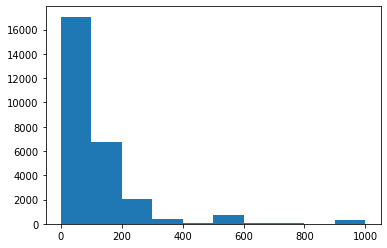

In [48]:
plt.hist(df['SUMDONATIONSGIVEN'], range = (0,1000))

(array([515.,  41.,  67.,  13.,  25.,   3.,   0.,   4.,   0.,   3.]),
 array([ 1000.,  2900.,  4800.,  6700.,  8600., 10500., 12400., 14300.,
        16200., 18100., 20000.]),
 <a list of 10 Patch objects>)

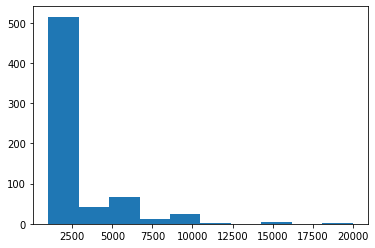

In [49]:
plt.hist(df['SUMDONATIONSGIVEN'], range = (1000, 20000))

## Date of Birth

Some entries appear to have a Date of Birth that is in the 1800s or earlier.  I dont' think these should be possible, I am going to write a flag for this.  Also we have 2 field for Date of Birth. Why?

In [50]:
df.iloc[5]['DATE_OF_BIRTH']

'1899-12-31'

In [51]:
end_date = "1910-1-31"

In [52]:
df['DATE_OF_BIRTH'] =  pd.to_datetime(df['DATE_OF_BIRTH'], errors = 'coerce')

In [53]:
df['DATE_OF_BIRTH'].head()

0          NaT
1          NaT
2   1961-12-07
3   1962-05-08
4   1980-11-04
Name: DATE_OF_BIRTH, dtype: datetime64[ns]

In [54]:
datesbefore1920 = df[df['DATE_OF_BIRTH'] <= end_date]

In [55]:
datesbefore1920.to_excel("Ages_above_110.xlsx")
#There appear to be 252 rows in the dataset that have birthdates before 1910.

In [56]:
datesbefore1920['DATE_OF_BIRTH']

5      1899-12-31
90     1899-12-31
153    1899-12-31
156    1899-12-31
157    1899-12-31
          ...    
1093   1899-12-31
1096   1899-12-31
1098   1899-12-31
1131   1900-01-01
1136   1899-12-31
Name: DATE_OF_BIRTH, Length: 252, dtype: datetime64[ns]

## First and Last Name

Looking at the first annd last name fields, it appears that 'Facebook' and 'Donor' are coming through for all of the facebook records for names.  Many other people are putting "Company" for first name---All of these are "Admin" records in the "Source" Column.

In [57]:
df['FIRSTNAME'].value_counts()

Facebook     5359
Company      1049
John          375
David         358
Michael       328
             ... 
Cathi           1
Shivaji         1
Hollie          1
Antun           1
Andrianna       1
Name: FIRSTNAME, Length: 4906, dtype: int64

In [58]:
df['LASTNAME'].value_counts()

Donor                     5359
Smith                      138
Miller                      95
Brown                       91
Johnson                     84
                          ... 
Mcadam                       1
Alfaro                       1
Eakes                        1
Energy Corporation PAC       1
Linker                       1
Name: LASTNAME, Length: 14325, dtype: int64

## Gender Notes


In [59]:
df['GENDER'].value_counts()

male                 6195
female               5970
prefer_not_to_say     787
other                  57
Name: GENDER, dtype: int64

## HASEXTRANET ACCESS

In [60]:
df['HASEXTRANETACCESS'].value_counts()

No     25709
Yes     2090
Name: HASEXTRANETACCESS, dtype: int64

## ISOFFLINE Notes

In [61]:
df['ISOFFLINE'].value_counts()

No     16153
Yes    11646
Name: ISOFFLINE, dtype: int64

## Language

Do we need to include language if everyone is just saying English?

In [62]:
df['LANGUAGE'].value_counts()

en    27799
Name: LANGUAGE, dtype: int64

## Mobile Carrier

What is "other.example.com"?  Is there anything we should do about this category?  Why do we want to collect this information?

In [63]:
df['MOBILECARRIER'].value_counts()

txt.att.net                174
vtext.com                  167
tmomail.net                 55
messaging.sprintpcs.com     41
other.example.com           39
email.uscc.net              13
vmobl.com                    2
myboostmobile.com            2
Name: MOBILECARRIER, dtype: int64

## Modified By

In [64]:
df['MODIFIEDBY'].value_counts()

Admin User          20958
Aubrey Griffin       1230
Alexandria Dixon      780
Kevin Jenkyns         758
Angela Green          567
                    ...  
Joel Tyler              1
Linda Glassel           1
Lynn Shisler            1
Sherry Shadow           1
Alissa Groff            1
Name: MODIFIEDBY, Length: 85, dtype: int64

## PHONE COLUMNS

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27799 entries, 0 to 27798
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ADDRESS2                        27799 non-null  object        
 1   BIRTHDATE                       0 non-null      float64       
 2   BUSINESSPHONE                   122 non-null    float64       
 3   BUSINESSPHONEEXTENSION          1 non-null      float64       
 4   CITY                            22036 non-null  object        
 5   COMPANYNAME                     2186 non-null   object        
 6   CONSTITUENTMANAGEDBY            27799 non-null  object        
 7   CONSTITUENTMANAGEDBYEMAIL       27799 non-null  object        
 8   CONSTITUENTMANAGERRELATIONSHIP  0 non-null      float64       
 9   COUNTRY                         27471 non-null  object        
 10  CREATEDBY                       27799 non-null  object        
 11  CR

Should we make users fill out 5 different fields for their phones?   Is this a good use of their time and of data collection?  Also most of these are not geting populated.

HOMEPHONE

BUSINESSPHONE

BUSINESSPHONEEXTENSION 

MOBILEPHONE

PREFERRED_PHONE

## Postal Code

Postal code should be all numbers.  Should it be only 5 digits or should it also include the 4 digits after the dash?  Should we write a flag for this?  I am going to write a check that checks for the right format for American Zip Codes. The others I will leave for now.  

In [66]:
dfusa = df[df["COUNTRY"]=="US"]

In [67]:
dfusa.head()

,ADDRESS2,BIRTHDATE,BUSINESSPHONE,BUSINESSPHONEEXTENSION,CITY,COMPANYNAME,CONSTITUENTMANAGEDBY,CONSTITUENTMANAGEDBYEMAIL,CONSTITUENTMANAGERRELATIONSHIP,COUNTRY,...,EMAIL_OPT_IN,POSTAL_OPT_IN,MOBILE_OPT_IN,RELATIONSHIP_MANAGER,ADDRESS1&2,Valid,CITYDigits,COMPANYDIGITS,ValidDWID,FacebookEMAIL
0,apt 1,NaN,NaN,NaN,Hudson,NaN,SELF,josh.conti.13@gmail.com,NaN,US,...,Yes,Yes,Yes,NaN,75 School St apt 1,True,False,NaN,True,False
1,,NaN,NaN,NaN,Portland,NaN,SELF,cc.boom49@gmail.com,NaN,US,...,Yes,Yes,Yes,NaN,3553 NE Schuyler St.,True,False,NaN,True,False
2,,NaN,NaN,NaN,Mount Pleasant,NaN,SELF,iwandodd@gmail.com,NaN,US,...,No,No,Yes,NaN,3576 Hartford Village Way,True,False,NaN,NaN,False
3,,NaN,NaN,NaN,Piedmont,NaN,SELF,mattcarrere@yahoo.com,NaN,US,...,Yes,Yes,Yes,NaN,1021 Leo Way,True,False,NaN,NaN,False
4,,NaN,NaN,NaN,Winter Garden,NaN,SELF,ereichwein@accredo.com,NaN,US,...,No,Yes,Yes,NaN,15143 Lake Claire Overlook Dr.,True,False,NaN,NaN,False


In [68]:
dfusa['POSTALCODE'] = dfusa['POSTALCODE'].astype('|S') #convert obejct into byte string
dfusa['POSTALCODE'] = dfusa['POSTALCODE'].str.decode("utf-8") # Decode byte strings into ordinary strings

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [69]:
def checklen(x):
    if len(x) < 5:
        return "Too Short"
    elif len(x) > 5:
        return "Detailed"
    else:
        return "Good"

In [70]:
dfusa['ZIPCODCHECK'] = dfusa['POSTALCODE'].apply(checklen)

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [71]:
dfusa['ZIPCODCHECK2'] = dfusa['POSTALCODE'].str.contains('[a-zA-Z]', regex=True)

C:\Users\jeremy.wendt\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [72]:
dfusa[['POSTALCODE','ZIPCODCHECK', 'ZIPCODCHECK2']].to_excel('testUSZIPS.xlsx')

In [73]:
dfusa['ZIPCODCHECK2'].value_counts()

False    21575
True      5384
Name: ZIPCODCHECK2, dtype: int64

In [74]:
dfusa['ZIPCODCHECK'].value_counts()

Good         15888
Too Short     7009
Detailed      4062
Name: ZIPCODCHECK, dtype: int64

Looks like we have a number of fields in ZIPCODE that we need to review.   We should probably set some rules here.  

## Relationship Manager

In [75]:
df['RELATIONSHIP_MANAGER'].value_counts()

Ms. Catherine Beatty                  36
Mr. Michael Rafidi                    20
Bailey Roach                          20
Ms. Janette Hoffman                   12
Eden Quayle                            5
Miss Alissa D. Groff                   5
Ms. Taryn Schultz                      4
Joe Holtman                            3
Ms. Elizabeth DiGeronimo               2
Janelle Del Carlo                      1
Ms. Erika Barnum                       1
Rachel Oster                           1
Mrs. Michelle Compain                  1
Ms. Amberrose Casey                    1
Ms. Kelley Cash                        1
Company Equitable Foundation, Inc.     1
Name: RELATIONSHIP_MANAGER, dtype: int64

## Relationship_To_MS

Is there a way to reduce the number of "Other" entries?

In [76]:
df["RELATIONSHIP_TO_MS"].value_counts()

Other                                                        7551
None                                                         4448
Friend has MS                                                4032
Relative has MS                                              1231
Parent has MS                                                 363
                                                             ... 
Friend has MS;Child has MS;Parent has MS;Relative has MS        1
Parent has MS;Sibling has MS;Caregiver of Person with MS        1
Child has MS;Parent has MS;Relative has MS;Friend has MS        1
Child has MS;Sibling has MS                                     1
Spouse has MS;Parent has MS;Relative has MS;Friend has MS       1
Name: RELATIONSHIP_TO_MS, Length: 144, dtype: int64

## Source

In [77]:
df["SOURCE"].value_counts()

Public      16279
Admin        6161
Facebook     5359
Name: SOURCE, dtype: int64

## State

Should we only allow UPPER CASE?  Or just write something to clean this on the back end?

In [78]:
df["STATE"].value_counts()

CA     2581
PA     2313
NY     2053
NC     1548
NJ     1530
       ... 
Mo        1
In        1
De        1
NSW       1
Nj        1
Name: STATE, Length: 78, dtype: int64

## Type

In [79]:
df['TYPE'].value_counts()

I    26063
C     1736
Name: TYPE, dtype: int64